<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierTransform_RealandImaginaryPartsDualBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Transform: Meaning of Real and Imaginary Parts
</h1></b>

Dr. Bingsen Wang

12/12/2023
</center>

#Python Code
The Python code illustrates the Fourier transform. The Fourier transform is carried out in $t_1$ and $t_2$, which is equivalent to integrating from $-\infty$ to $\infty$ with $f(t)$ being clipped by Heaviside functions, i.e.

$$\begin{align}
\hat f(\omega) &= \int_{-\infty}^{\infty}f(t)[\Phi(t-t1)-\Phi(t-t2)]e^{-j\omega t}dt\\
&=\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt
\end{align}\tag{1}$$
where $\Phi(t)$ is Heaviside function.

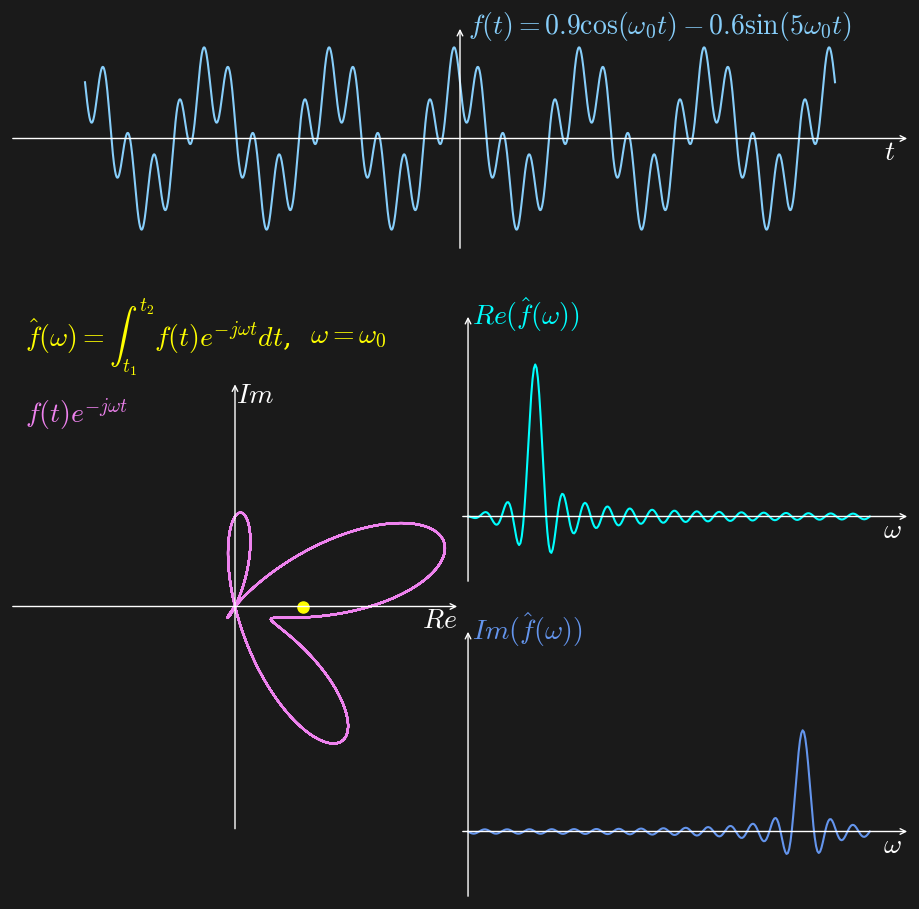

In [39]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag,heaviside
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(t,f,a1,a2): #cosine function
  return a1*cos(2*pi*f*t)- a2*sin(2*pi*5*f*t)

def fourierIntegrand(t,f,f0,a1,a2): #integrand
  return exp(-1j*2*pi*f*t)*y(t,f0,a1,a2)

def fourierIntegral(f,f0,a1,a2,t1,t2): #Fourier transform, the integral
    def real_func(t,f,f0,a1,a2):
        return real(fourierIntegrand(t,f,f0,a1,a2))
    def imag_func(t,f,f0,a1,a2):
        return imag(fourierIntegrand(t,f,f0,a1,a2))
    # real_integral = quad(real_func, a, b, **kwargs)
    real_integral = quad(real_func,t1,t2, args=(f,f0,a1,a2))
    imag_integral = quad(imag_func,t1,t2, args=(f,f0,a1,a2))
    # imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','navy','k',(.1,.1,.1),'w'] #colors light bg
Nf = 25
t1=-0.5
t2=0.5
t=linspace(t1,t2,2048)
a1 = linspace(0.9,0,Nf)
a2 = linspace(0.6,0,Nf)
f0=6
fst = 0 #starting frequency
fnd = 6 #end frequency
fr = linspace(fst,fnd,300)#frequency ratio

fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 0.72, 1, .25], [-.6,.6], [-1.8,1.8]], #signal
            [[.0, .075,   .5, .5], [-1.5,1.5], [-1.5,1.5]], #Fourier transform
            [[.5, .35,   .5, .3], [-.02,1.1], [-.2,.6]], #real f(omega)
            [[.5, 0,   .5, .3], [-.02,1.1], [-.2,.6]], #imag f(omega)
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['', '$t$'],
        ['$Im$', '$Re$'],
        [r'$Re(\hat f(\omega))$', '$\omega$'],
        [r'$Im(\hat f(\omega))$', '$\omega$'],
        ] #variables for yx axes of each subplot
# clst=['mediumblue','m','brown','darkblue'] #colors of lines
ax_lst=[] #axis list or the list of subplots
ytxt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=1.5)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right',color=clst[-2]) #x-axis label
  if k==1:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top',color=clst[-2])) #y label
  else:
    ytxt_lst.append(ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='center')) #y label
line_lst.append(ax_lst[1].plot([], [],color=clst[4],ls='',marker='o',markersize='8')[0])
ax_lst[1].text(-1.4,ax_frame[1][2][1]+.3,r'$\hat f(\omega) =\int_{t_1}^{t_2}f(t)e^{-j\omega t}dt$,',color=clst[4],va='center',size=20)
ax_lst[1].text(-1.4,ax_frame[1][2][1]-0.1,'$f(t)e^{-j\omega t}$',color=clst[1],va='top',size=20)
title1= ax_lst[1].text(.5,ax_frame[1][2][1]+.3,'',va='center',size=20,color=clst[4])

# animation function. This is called sequentially
def animate(i):
  ii = i%Nf
  k = int(i/Nf)
  if k==0: #change the cosine amplitude
    yt=y(t,f0,a1[ii],a2[0])
    yft=[]
    for x in fr: #Fourier integral
      yft.append(fourierIntegral(x*f0,f0,a1[ii],a2[0],t1,t2)[0])
    yft0 = fourierIntegral(f0,f0,a1[ii],a2[0],t1,t2)[0] #Fourier transform integrand at w0
    fti = fourierIntegrand(t,f0,f0,a1[ii],a2[0])#Fourier transform integrand at w0
    title1.set_text('$\omega =\omega_0$')
    ytxt_lst[0].set_text(r'$f(t)='+str(round(a1[ii],2))+'\cos(\omega_0 t)-'+ str(round(a2[0],2))+'\sin(5\omega_0 t)$')
  else: #change the sine amplitude
    yt=y(t,f0,a1[0],a2[ii])
    yft=[]
    for x in fr: #Fourier integral
      yft.append(fourierIntegral(x*f0,f0,a1[0],a2[ii],t1,t2)[0])
    yft0 = fourierIntegral(  5*f0,f0,a1[0],a2[ii],t1,t2)[0] #Fourier transform integrand at 5w0
    fti = fourierIntegrand(t,5*f0,f0,a1[0],a2[ii])#Fourier transform integrand at 5w0
    title1.set_text('$\omega =5\omega_0$')
    ytxt_lst[0].set_text(r'$f(t)='+str(round(a1[0],2))+'\cos(\omega_0 t)-'+ str(round(a2[ii],2))+'\sin(5\omega_0 t)$')

  line_lst[0].set_data(t,yt)
  line_lst[1].set_data(real(fti),imag(fti))
  line_lst[2].set_data(fr/(fnd-fst),real(yft))
  line_lst[3].set_data(fr/(fnd-fst),imag(yft))
  line_lst[4].set_data([real(yft0)],[imag(yft0)])
  return

anim = animation.FuncAnimation(fig, animate, frames=2*Nf, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierTransform_realImaginary.mp4"
writervideo = animation.FFMpegWriter(fps=1)
anim.save(fn, writer=writervideo,dpi = 120)